In [1]:
import numpy as np
import numpy.linalg as npl
import math
import matplotlib.pyplot as plt

# 7.1 Geometric Transformations

In [2]:
#a rotation matrix:
Rotation = lambda angle:np.array([[np.cos(angle), -np.sin(angle)],[np.sin(angle),np.cos(angle)]])
r60 = Rotation(np.pi/3)
r60

array([[ 0.5      , -0.8660254],
       [ 0.8660254,  0.5      ]])

In [3]:
#some list of 2d points:
pts = np.array([[1,0],[1.5,0],[2,0],[1,.25],[1.5,.25],[1,.5]])
r60pts = np.vstack([np.matmul(r60,p) for p in pts])
r60pts

array([[0.5       , 0.8660254 ],
       [0.75      , 1.29903811],
       [1.        , 1.73205081],
       [0.28349365, 0.9910254 ],
       [0.53349365, 1.42403811],
       [0.0669873 , 1.1160254 ]])

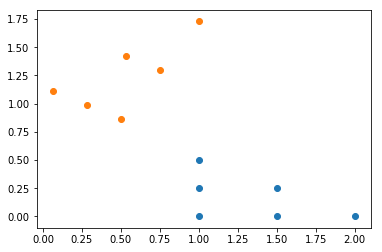

In [4]:
plt.scatter([pts[i][0] for i in range(len(pts))],[pts[i][1] for i in range(len(pts))])
plt.scatter([r60pts[i][0] for i in range(len(pts))],[r60pts[i][1] for i in range(len(pts))])

In [5]:
#a reflection matrix
Reflection = lambda angle:np.array([[np.cos(2*angle),np.sin(2*angle)],[np.sin(2*angle),-np.cos(2*angle)]])
reflect60 = Reflection(np.pi/3)
ref60pts = np.vstack([np.matmul(reflect60,p) for p in pts])

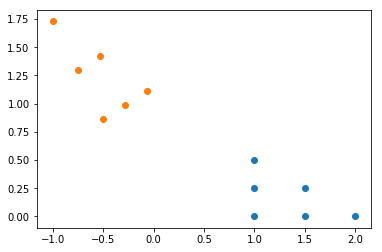

In [6]:
plt.scatter([pts[i][0] for i in range(len(pts))],[pts[i][1] for i in range(len(pts))])
plt.scatter([ref60pts[i][0] for i in range(len(pts))],[ref60pts[i][1] for i in range(len(pts))])

# 7.2 Selectors

In [7]:
flipper = lambda n: np.flip(np.eye(5),1) #J: reverse(eye(n), dims=1)
A = flipper(5)
A

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [8]:
#reverse order of x with reverser (flipper) matrix
x = np.array([1.,2.,3.,4.,5.])
x, np.matmul(A,x)

(array([1., 2., 3., 4., 5.]), array([5., 4., 3., 2., 1.]))

In [9]:
#can also just flip x directly:
np.flip(x)

array([5., 4., 3., 2., 1.])

In [10]:
A,x = np.matrix([[0,0,1],[1,0,0],[0,1,0]]), np.array([.2,-1.7,2.4])
A,x

(matrix([[0, 0, 1],
         [1, 0, 0],
         [0, 1, 0]]), array([ 0.2, -1.7,  2.4]))

In [11]:
np.matmul(A,x) #permutations of x

matrix([[ 2.4,  0.2, -1.7]])

In [12]:
x[[2,0,1]]

array([ 2.4,  0.2, -1.7])

# 7.3 Incidence Matrix

In [13]:
# Flow in an incidence matrix
A = np.matrix([[-1,-1,0,1,0],[1,0,-1,0,0],[0,0,1,-1,-1],[0,1,0,0,1]])

In [14]:
xcirc = np.array([1,-1,1,0,1])
np.matmul(A,xcirc)

matrix([[0, 0, 0, 0]])

In [15]:
s = np.array([1,0,-1,0])
x = np.array([.6,.3,.6,-.1,-.3])
np.matmul(A,x)+s 

matrix([[0., 0., 0., 0.]])

In [16]:
#Dirichlet energy is a measure of how variable a function is
A

matrix([[-1, -1,  0,  1,  0],
        [ 1,  0, -1,  0,  0],
        [ 0,  0,  1, -1, -1],
        [ 0,  1,  0,  0,  1]])

In [17]:
vsmooth = np.array([1,2,2,1])
vsmooth

array([1, 2, 2, 1])

In [18]:
#Reminder on matrix vector mult:
A = np.array([[0,2,-1],[-2,1,1]])
x = np.array([2,1,-1])
np.matmul(A,x)

array([ 3, -4])

In [19]:
A = np.array([[-1,-1,0,1,0],[1,0,-1,0,0],[0,0,1,-1,-1],[0,1,0,0,1]]).transpose()
#Note: A needs to be transposed because Julia automatically 
#calculates column wise based on dimension of vsmooth and A
vsmooth = np.array([1,2,2,1])
npl.norm(np.matmul(A,vsmooth))**2 #J: norm(A'*vsmooth)^2

2.9999999999999996

In [20]:
vrough = np.array([1,-1,2,-1])
npl.norm(np.matmul(A,vrough))**2 

27.0

# 7.4 Convolution

Convolution is applying one function to another and getting a third function that describes how the application of the second function affected the initial function.

In [21]:
a,b,c = np.array([1,1]),np.array([2,-1,1]),np.array([1,1,-2])
d = np.convolve(np.convolve(a,b),c)
d

array([ 2,  3, -3, -1,  1, -2])

In [22]:
#a matrix can be convolved into toeplitz form 
#by holding diagonals constant
def toeplitz(b,n):
    m = len(b)
    T = np.zeros((n+m-1,n))
    for i in range(m):
        for j in range(len(T[i])):
            T[j+i][j]=b[i]
            #J: T[i:n+m:end] .= b[i]
            #there probably exists a more elegant implementation
    return T
b,a = np.array([-1,2,3]), np.array([-2,3,-1,1])
Tb = toeplitz(b,len(a))
Tb

array([[-1.,  0.,  0.,  0.],
       [ 2., -1.,  0.,  0.],
       [ 3.,  2., -1.,  0.],
       [ 0.,  3.,  2., -1.],
       [ 0.,  0.,  3.,  2.],
       [ 0.,  0.,  0.,  3.]])

In [23]:
np.matmul(Tb,a), np.convolve(b,a)

(array([ 2., -7.,  1.,  6., -1.,  3.]), array([ 2, -7,  1,  6, -1,  3]))

In [24]:
m,n = 2000,2000
b,a = np.random.randn(n), np.random.randn(m)
toep = toeplitz(b,n)*a
conv = np.convolve(a,b)

In [25]:
%timeit toep = toeplitz(b,n)*a

1.02 s ± 15.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%timeit conv = np.convolve(a,b)

456 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
